In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

### Задание 1
Загрузите датасет из файла heart.csv со следующими полями (выборка об уровне сердечных заболеваний:
<ul>
<li>age : Возраст
<li>sex : Пол (1 = мужской; 0 = женский)
<li>cp : боль в груди (0 - типичная, 1 - асимптотическая, 2 - неангинальная, 3 - нетипичная).
<li>trestbps : кровяное давление в состоянии покоя.
<li>chol : холестерин сыворотки в мг/дл.
<li>fbs : уровень сахара в крови натощак > 120 мг/дл (1 = верно; 0 = неверно)
<li>restecg : результаты электрокардиографии в состоянии покоя
<li>thalach : максимальная частота сердечных сокращений
<li>exang : стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
<li>oldpeak : депрессия ST, вызванная нагрузкой по сравнению с отдыхом.
<li>slope : Наклон пикового сегмента ST при нагрузке.
<li>ca : количество крупных сосудов, окрашенных флюороскопически (0–3).
<li>thal : (3 = нормально; 6 = фиксированный дефект; 7 = обратимый дефект)
<li>target : АГД - Диагностика заболеваний сердца (1 = да; 0 = нет)
</ul>
<ol>
<li>Выведите полученный датасет на экран
<li>Пользуясь загруженным датасетом, подтвердите или опровергните гипотезу, что доля населения, страдающего сердечными заболеваниями в городе N, превышает 46% (выведите "да", если это так, и "нет" в противном случае). Также выведите на экран полученное значение p-value, округлив его до 6 знаков после запятой.
</ol>    

In [2]:
df = pd.read_csv('heart.csv')
print(df)

# Подсчет доли населения, страдающего сердечными заболеваниями
population = len(df) # общая чиленность 
heart_hurt = len(df[df['target'] == 1]) # те кто страдают
heart_hurt_dol = heart_hurt / population

if heart_hurt_dol > 0.46:
    print("Да")                            # ну и отвечаем на поставленный вопрос
else:
    print("Нет")

print("p_value = ", round(heart_hurt_dol, 6))         # округляем до 6 знаков после запятой

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2     

### Задание 2
Есть предположение, что среднее давление мужчин и женщин в состоянии покоя в городе N не отличается. Но некоторыми учеными была выдвинута гипотеза, что женщины имеют среднее давление выше чем мужины. Примите или опровергните альтернативную гипотезу. Для этого предварительно убедитесь, что генеральные совокупности имеют равные дисперсии и что обе выборки имеют распределение, близкое к нормальному (с помощью гистограммы). Выведите значение p-value, округлив до 6 знаков после запятой.


Дисперсии не равны, коррекция будет произведена.


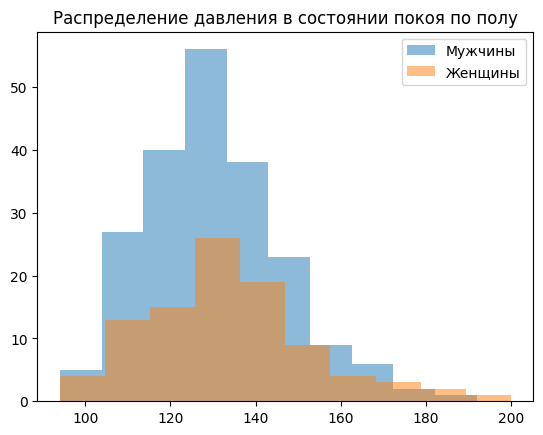

Значение p-value:  0.324683
Не отвергаем нулевую гипотезу. Нет статистического различия в среднем давлении между мужчинами и женщинами.


In [3]:
male_data = df[df['sex'] == 1]['trestbps']
female_data = df[df['sex'] == 0]['trestbps']

# Проверка дисперсий
equal_var = True  # предположение о равенстве дисперсий
if male_data.var() != female_data.var():
    print("Дисперсии не равны, коррекция будет произведена.")
    equal_var = False

# Построение гистограмм
plt.hist(male_data, alpha=0.5, label='Мужчины')
plt.hist(female_data, alpha=0.5, label='Женщины')
plt.legend()
plt.title('Распределение давления в состоянии покоя по полу')
plt.show()

# Проведение t-теста
statistic, p_value = stats.ttest_ind(male_data, female_data, equal_var)

# Вывод результатов
print("Значение p-value: ", round(p_value, 6))

# Принятие решения об отвержении/неотвержении альтернативной гипотезы
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Существует статистическое различие в среднем давлении между мужчинами и женщинами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистического различия в среднем давлении между мужчинами и женщинами.")

### Задание 3
Считается, что средний уровень холестерина среди населения старше 60 лет, равен 250. Была выдвинута гипотеза, что это не так (что она не равна 250). Примите или опровергните эту гипотезу.Выведите значени p-value.

In [4]:
# Выборка уровня холестерина среди населения старше 60 лет
cholesterol_over_60 = df[df['age'] > 60]['chol']

# Проведение одновыборочного t-теста
statistic, p_value = stats.ttest_1samp(cholesterol_over_60, 250)

# Вывод результатов
print("Значение p-value:", p_value)

# Принятие решения об отвержении/неотвержении нулевой гипотезы
if p_value < 0.05:
    print("Отвергаем нулевую гипотезу. Средний уровень холестерина не равен 250.")
else:
    print("Не отвергаем нулевую гипотезу. Средний уровень холестерина равен 250.")

Значение p-value: 0.15876173897401408
Не отвергаем нулевую гипотезу. Средний уровень холестерина равен 250.


### Задание 4
Вычислите доверительный интервал с уровнем точности 95% для среднего значения максимальной частоты сердечных сокращений населения в городе N.

In [5]:
max_heart_rate = df['thalach']

# Расчет среднего и стандартного отклонения
mean_value = np.mean(max_heart_rate) #  среднеее
std_dev = np.std(max_heart_rate, ddof=1)  # стандартное, ddof=1 для использования выборочной дисперсии
# Расчет размера выборки
sample_size = len(max_heart_rate)
# Расчет стандартной ошибки среднего
standard_error = std_dev / np.sqrt(sample_size)
# наш уровень доверя
confidence_level = 0.95
# Расчет критического значения t
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=sample_size - 1)
# Расчет доверительного интервала
margin_of_error = t_critical * standard_error
confidence_interval = (mean_value - margin_of_error, mean_value + margin_of_error)
# Вывод результатов
print("Доверительный интервал (95%):", confidence_interval)

Доверительный интервал (95%): (147.05743526626375, 152.23629410667357)
